# Natural Language Processing

In [5]:
data = [('Big data', 100, 15),
        ('Hadoop', 95, 25),
        ('Python', 75, 50),
        ('R', 50, 40),
        ('Machine Learning', 80, 20),
        ('Statistics', 20, 60),
        ('Data Science', 60, 70),
        ('analytics', 90, 3),
        ('Team Player', 85, 85),
        ('dynamic', 2, 90),
        ('synergier', 70, 0),
        ('actionable insights', 40, 30),
        ('think out of the box', 45, 10),
        ('self-starter', 30, 50),
        ('customer focus', 65, 15),
        ('thought leadership', 35, 35)]

In [6]:
from matplotlib import pyplot as plt

In [7]:
def text_size(total: int) -> float:
    '''equals 8 if total is 0, 28 if total is 200'''
    return 8 + total / 200 * 20

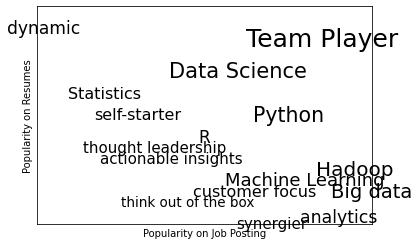

In [9]:
for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word,
        ha='center', va='center', size = text_size(job_popularity+resume_popularity))

plt.xlabel('Popularity on Job Posting')
plt.ylabel('Popularity on Resumes')
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

## N-Gram Language Models

In [14]:
def fix_unicode(text: str) -> str:
    return text.replace(u"\u2019", "'")

In [15]:
import re
from bs4 import BeautifulSoup
import requests

In [61]:
url = "https://www.oreilly.com/ideas/what-is-data-science" 

In [62]:
html = requests.get(url).text

In [63]:
soup = BeautifulSoup(html, 'html5lib')
content = soup.find("div", "main-post-radar-content")
regrex = r"[\w']+|[\.]"

In [64]:
document = []

for para in content("p"):
    words = re.findall(regrex, fix_unicode(para.text))
    document.extend(words)

In [65]:
document = document[103:].copy()

In [68]:
from collections import defaultdict

In [69]:
transitions = defaultdict(list)

In [70]:
for prev, current in zip(document, document[1:]):
    transitions[prev].append(current)

In [72]:
def generate_using_bigrams() -> str:
    current = '.'
    result = []
    
    while True:
        next_word_candidates = transitions[current]
        current = random.choice(next_word_candidates)
        result.append(current)

        if current == '.': return " ".join(result)
        

In [73]:
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in zip(document, document[1:], document[2:]):
    if prev == '.':
        '''if the previous word was a period then this is a start word'''
        starts.append(current)
    trigram_transitions[(prev, current)].append(next)

In [76]:
def generate_using_trigrams() -> str:
    current = random.choice(starts)
    prev = '.'
    result = [current]

    while True:
        next_word_cadndidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_cadndidates)
        prev, current = current, next_word
        result.append(current)

        if current == '.':
            return " ".join(result)

## Grammars

In [77]:
from typing import List, Dict

In [88]:
Grammar = Dict[str, List[str]]

grammar = {
    "_S": ["_NP _VP"],
    "_NP": ["_N",
             "_A _NP _P _A _N"],
    "_VP": ["_V",
             "_V _NP"],
    "_N": ["data science", "Python", "regression"],
    "_A": ["big", "linear", "logistic"],
    "_P": ["about", "near"],
    "_V": ["learns", "trains", "tests", "is"] }


In [89]:
def is_terminal(token: str) -> bool:
    return token[0] != "_"

In [90]:
def expand(grammar: Grammar, tokens: List[str]) -> List[str]:
    for i, token in enumerate(tokens):
        if is_terminal(token): continue
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
        
        return expand(grammar, tokens)

    return tokens

In [91]:
def generate_sentance(grammar: Grammar) -> List[str]:
    return expand(grammar, ["_S"])

## An Aside: Gibbs Sampling

In [95]:
from typing import Tuple
import random

In [96]:
def roll_a_die() -> int:
    return random.choice([1, 2, 3, 4, 5, 6])

In [97]:
def direct_sample() -> Tuple[int, int]:
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

In [108]:
def random_y_given_x(x: int) -> int:
    '''equally likely to be x + 1, x + 2, ... , x + 6'''
    return x + roll_a_die()

In [99]:
def random_x_given_y(y: int) -> int:
    if y <= 7:
        return random.randrange(1, y)
    else:
        random.randrange(y - 6, 7)

In [113]:
def gibbs_sample(num_iters: int = 100) -> Tuple[int, int]:
    x, y = 1, 2
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)

    return x, y

In [114]:
def compare_distributions(num_samples: int = 1000) -> Dict[int, List[int]]:
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

## Topic Modeling


In [43]:
from typing import List
import random


def sample_from(weights: List[float]) -> int:
    '''returns i with probability weights[i] / sum(weights)'''
    total = sum(weights)
    rnd = total * random.random()
    for i, w in enumerate(weights):
        rnd -= w
        if rnd <= 0: return i

In [44]:
from collections import Counter

In [45]:
draws = Counter(sample_from([0.1, 0.1, 0.8]) for _ in range(1000))

In [46]:
draws

Counter({0: 98, 2: 785, 1: 117})

In [47]:
documents = [["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],["R", "Python", "statistics", "regression", "probability"],
["machine learning", "regression", "decision trees", "libsvm"],["Python", "R", "Java", "C++", "Haskell", "programming languages"],
["statistics", "probability", "mathematics", "theory"],
["machine learning", "scikit-learn", "Mahout", "neural networks"], ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
["Hadoop", "Java", "MapReduce", "Big Data"],
["statistics", "R", "statsmodels"],
["C++", "deep learning", "artificial intelligence", "probability"],["pandas", "R", "Python"],
["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
["libsvm", "regression", "support vector machines"]]

In [48]:
k = 4

In [49]:
document_topic_counts = [Counter() for _ in documents]

In [50]:
topic_word_counts = [Counter() for _ in range(k)]

In [51]:
topic_counts = [0 for _ in range(k)]

In [52]:
document_lengths = [len(document) for document in documents]

In [53]:
distinct_words = set(word for document in documents for word in document)
w = len(distinct_words)

In [54]:
d = len(documents)

In [55]:
def p_topic_given_document(topic: int, d: int, alpha: float = .1) -> float:
    '''the fraction of words in document "d" that are assinged to 
    "Topic" (+ some smoothing)
    '''
    return ((document_topic_counts[d][topic] + alpha) / 
            (document_lengths[d] + k * alpha))

In [56]:
def p_word_given_topic(word: str, topic: int, beta: float = 0.1) -> float:
    """the fraction of words assigned to 'topic' that equal 'word' + smoothing """
    return ((topic_word_counts[topic][word] + beta) / 
            (topic_counts[topic] + w * beta))

In [57]:
def topic_weight(d: int, word: str, k: int) -> float:
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

In [58]:
def choose_new_topic(d: int, word: str) -> int:
    return sample_from([topic_weight(d, word, k)
                         for k in range(k)])

In [59]:
random.seed(0)

document_topics = [[random.randrange(k) for word in document]
                   for document in documents]

In [60]:
for d in range(d):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [61]:
import tqdm

In [63]:
for iter in tqdm.trange(10000):
    for d in range(d):
        for i, (Word, topic) in enumerate(zip(documents[d],document_topics[d])):
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] +=1


100%|██████████| 10000/10000 [00:00<00:00, 494961.53it/s]


In [64]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0:
            print(k, word, count)

0 scikit-learn 2
0 pandas 2
0 HBase 1
0 R 1
0 regression 1
0 Java 1
0 C++ 1
0 Haskell 1
0 statistics 1
0 artificial intelligence 1
0 Hadoop 1
0 Big Data 1
0 statsmodels 1
0 libsvm 1
1 neural networks 2
1 deep learning 2
1 Cassandra 1
1 HBase 1
1 Python 1
1 numpy 1
1 decision trees 1
1 theory 1
1 Mahout 1
1 databases 1
1 Postgres 1
1 MySQL 1
1 MongoDB 1
2 Java 2
2 Python 2
2 regression 2
2 R 2
2 Cassandra 1
2 MongoDB 1
2 Postgres 1
2 scipy 1
2 statsmodels 1
2 probability 1
2 mathematics 1
2 machine learning 1
2 statistics 1
2 C++ 1
2 artificial intelligence 1
2 HBase 1
3 Big Data 2
3 probability 2
3 Hadoop 1
3 Spark 1
3 Storm 1
3 NoSQL 1
3 statistics 1
3 machine learning 1
3 libsvm 1
3 Python 1
3 programming languages 1
3 MapReduce 1
3 R 1
3 support vector machines 1


In [65]:
topic_names = ["big data and programming languages", 
               "python and statistics", "databases", "machine Learning"]

In [66]:
for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count) 
            print()

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
machine Learning 4

databases 2

big data and programming languages 1

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
databases 2

python and statistics 2

machine Learning 1

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
python and statistics 2

big data and programming languages 2

databases 2

['R', 'Python', 'statistics', 'regression', 'probability']
big data and programming languages 2

databases 2

machine Learning 1

['machine learning', 'regression', 'decision trees', 'libsvm']
machine Learning 2

databases 1

python and statistics 1

['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
big data and programming languages 3

machine Learning 2

databases 1

['statistics', 'probability', 'mathematics', 'theory']
big data and programming languages 1

machine Learning 1

databases 1

python and statistics 1

['machine learning', 'scikit-learn', 'Mahout', 'neural netw